In [81]:
#Dependencies
from citipy import citipy
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [82]:
api_key ='e80b948b744b583baae870250194a510'

In [83]:
randCity = []
randCountry = []
loopcnt = 0

#find cities
while len(randCity) < 600 :
    # Loop counter to track number of loops made
    loopcnt +=1
    
    # Random lat
    lat_pos = random.randint(0,2)
    base_lat = random.randint(0,91)
    dec_lat = random.random()/100
    lat = base_lat + dec_lat
    if lat_pos == 1:
        lat = lat * -1
    
    
    # Random lon
    lng_pos = random.randint(0,2)
    base_lng = random.randint(0,181)
    dec_lng = random.random()/100
    lng = base_lng + dec_lng
    if lng_pos == 1:
        lng = lng * -1
    #print(f"The longitude is: {lng}") 
    
    # Citipy file to get nearest city based on random lat and lng
    city = citipy.nearest_city(lat, lng)
    
    # see if the random city is already in the list if not add
    foundCity = False
    for x in range(len(randCity)):
        if city.city_name == randCity[x]:
            foundCity = True
    if foundCity==False  :   
        randCity.append(city.city_name)
        randCountry.append(city.country_code)

In [84]:
# api.openweathermap.org/data/2.5/weather?lat=35&lon=139
def get_current_weather(df_object):
    api_key = 'e80b948b744b583baae870250194a510'
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {'APPID': api_key,
              'lat': df_object.lat,
              'lon': df_object.lon,
              'units': 'Imperial'
             }
    data =requests.get(base_url, params=params)
    return data.json()
    time.sleep(.50)
    

In [85]:
# Build query Url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = 'e80b948b744b583baae870250194a510'
units = "imperial"

query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

In [86]:
#test api

print(query_url+ 'Denver')

http://api.openweathermap.org/data/2.5/weather?appid=e80b948b744b583baae870250194a510&units=imperial&q=Denver


In [ ]:
# Loop through the cities and perform request for data on each
search_data = []
cityList = []
countryList = []

searchCnt = 0
for city in randCity:
    searchCnt += 1
    print(f"Processing record {searchCnt} for the city: {city}")   
    response = requests.get(query_url + city).json()
    searchCityID = response.get("id")
    if response.get("id"):
        print(f"     Record found for city: {city}    city id: {searchCityID}")
        search_data.append(response)
        cityList.append(city)
        countryList.append(randCountry[searchCnt-1])
    else:
        print(f"     No weather record found for city: {city}")
          

Processing record 1 for the city: amderma
     No weather record found for city: amderma
Processing record 2 for the city: mocambique
     No weather record found for city: mocambique
Processing record 3 for the city: belushya guba
     No weather record found for city: belushya guba
Processing record 4 for the city: cape town
     Record found for city: cape town    city id: 3369157
Processing record 5 for the city: ushuaia
     Record found for city: ushuaia    city id: 3833367
Processing record 6 for the city: faanui
     Record found for city: faanui    city id: 4034551
Processing record 7 for the city: myanaung
     Record found for city: myanaung    city id: 1308204
Processing record 8 for the city: snezhnogorsk
     Record found for city: snezhnogorsk    city id: 795243
Processing record 9 for the city: divnogorsk
     Record found for city: divnogorsk    city id: 1507379
Processing record 10 for the city: xiangfan
     No weather record found for city: xiangfan
Processing recor

In [73]:
#print(json.dumps(search_data[2], indent=4))
len(search_data)


484

In [74]:
#pull in lat long and humidity, cloud, wind speed, temp

lat_data = [data.get("coord").get("lat") for data in search_data]
lng_data = [data.get("coord").get("lon") for data in search_data]
temp_data = [data.get("main").get("temp") for data in search_data]
humid_data = [data.get("main").get("humidity") for data in search_data]
cloud_data =[data.get("clouds").get("all") for data in search_data]
wind_data = [data.get("wind").get("speed") for data in search_data]

In [75]:
#dataFrame with items pulled
weather_data = pd.DataFrame({"cityName":cityList,
                            "country":countryList,
                            "lat":lat_data,
                            "lng":lng_data,
                            "temp":temp_data,
                            "humidity":humid_data,
                            "cloudiness":cloud_data,
                            "winds":wind_data})

In [76]:
weather_data = weather_data[["cityName","country","lat","lng","temp","humidity","cloudiness","winds"]]
weather_data.head()

,cityName,country,lat,lng,temp,humidity,cloudiness,winds
0,atuona,pf,-9.80,-139.03,80.59,100,0,17.72
1,ushuaia,ar,-54.81,-68.31,28.40,86,75,5.82
2,butaritari,ki,3.07,172.79,84.46,100,44,3.51
3,ribeira grande,pt,38.52,-28.70,70.69,100,92,4.97
4,amalapuram,in,16.58,82.00,82.39,85,56,13.13


In [ ]:
# Save weather data to csv file
weather_data.to_csv("weatherdata.csv", encoding="utf-8", index=False)

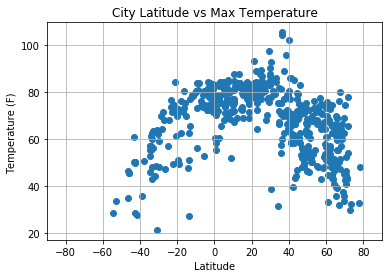

In [77]:
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Add chart labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_MaxTemp.png")
# Show plot
plt.show()


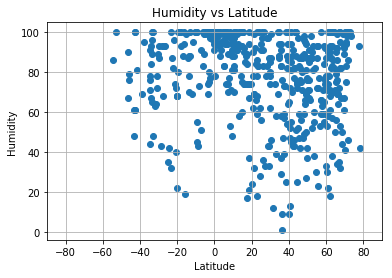

In [78]:
# Latitude vs Humidity
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Add chart labels
plt.title("Humidity vs Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")

# Show plot
plt.show()

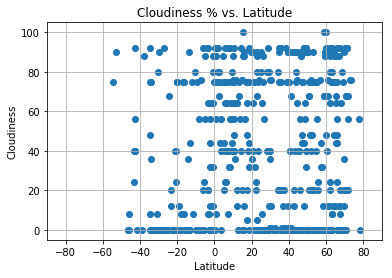

In [79]:

# Latitude vs Cloudiness
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Add chart labels
plt.title("Cloudiness % vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

# Show plot
plt.show()

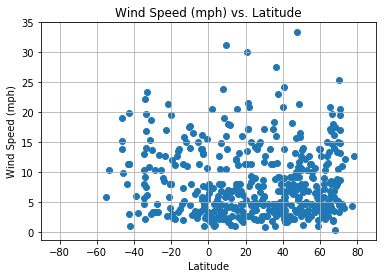

In [80]:
# Latitude vs Wind Speed
plt.scatter(weather_data["lat"], weather_data["winds"], marker="o")

# Add chart labels
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_WindSpeed.png")

# Show plot
plt.show()